# It's the data, stupid!
 Lesson that I learnd from project is 'It's the data, stupid!'

High performance improvement was possible when I did feature engineering.

# Plan
Need to solve overfittng problem.


#Goal
Let's create a machine learning model that predicts who will buy our products.

# Evaluation
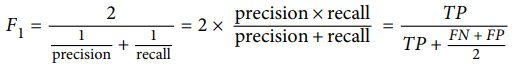

# 1. Check data
Essential Library

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import matplotlib.pyplot as plt

In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/LG Aimers/train.csv") # Train set
df_test = pd.read_csv("/content/drive/MyDrive/LG Aimers/submission.csv") # Test set

# Take a Quick Look at the Data Structure
* 'is_converted' is label
* Precision and Recall should be similar numbers to maximize the F1 score.

##Data Source

https://www.lg-informationdisplay.com/

* Click it Inquiry to Buy


## Data instruction

- bant_submit

    Budget, Authority, Need, Timeframe ratio in MQL.

- com_reg_ver_win_rate

    Opportunity ratio based on vertical Level 1, business unit, region.

- id_strategic_ver:

    Give weight If the business_unit is ID.

- it_strategic_ver
    
    Give weight If the business_unit is ID,

- idit_strategic_ver

    Give weight If the business_unit is ID and IT.

- lead_desc_length
    
    The length of the lead description text written by the customer.

- ver_cus

    Give weight If it is vertical level 1 and end user.

- ver_pro

    .Give weight If it is vertical level 1 and specific product category.


- is_converted

    Sales conversion status
    

##Data Structure

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59299 entries, 0 to 59298
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   bant_submit              59299 non-null  float64
 1   customer_country         58317 non-null  object 
 2   business_unit            59299 non-null  object 
 3   com_reg_ver_win_rate     14568 non-null  float64
 4   customer_idx             59299 non-null  int64  
 5   customer_type            15338 non-null  object 
 6   enterprise               59299 non-null  object 
 7   historical_existing_cnt  13756 non-null  float64
 8   id_strategic_ver         3444 non-null   float64
 9   it_strategic_ver         1121 non-null   float64
 10  idit_strategic_ver       4565 non-null   float64
 11  customer_job             40566 non-null  object 
 12  lead_desc_length         59299 non-null  int64  
 13  inquiry_type             58358 non-null  object 
 14  product_category      

In [ ]:
df_train.head(10)

,bant_submit,customer_country,business_unit,com_reg_ver_win_rate,customer_idx,customer_type,enterprise,historical_existing_cnt,id_strategic_ver,it_strategic_ver,...,response_corporate,expected_timeline,ver_cus,ver_pro,ver_win_rate_x,ver_win_ratio_per_bu,business_area,business_subarea,lead_owner,is_converted
0,1.00,/Quezon City/Philippines,AS,0.066667,32160,End-Customer,Enterprise,NaN,NaN,NaN,...,LGEPH,less than 3 months,1,0,0.003079,0.026846,corporate / office,Engineering,0,True
1,1.00,/PH-00/Philippines,AS,0.066667,23122,End-Customer,Enterprise,12.0,NaN,NaN,...,LGEPH,less than 3 months,1,0,0.003079,0.026846,corporate / office,Advertising,1,True
2,1.00,/Kolkata /India,AS,0.088889,1755,End-Customer,Enterprise,144.0,NaN,NaN,...,LGEIL,less than 3 months,1,0,0.003079,0.026846,corporate / office,Construction,2,True
3,1.00,/Bhubaneswar/India,AS,0.088889,4919,End-Customer,Enterprise,NaN,NaN,NaN,...,LGEIL,less than 3 months,1,0,0.003079,0.026846,corporate / office,IT/Software,3,True
4,1.00,/Hyderabad/India,AS,0.088889,17126,Specifier/ Influencer,Enterprise,NaN,NaN,NaN,...,LGEIL,less than 3 months,0,0,0.003079,0.026846,corporate / office,NaN,4,True
5,1.00,/Abuja/Nigeria,AS,0.040816,16328,End-Customer,SMB,NaN,NaN,NaN,...,LGEAF,less than 3 months,1,0,0.003079,0.026846,corporate / office,Engineering,5,True
6,0.75,"/Jeddah, KSA/Saudi Arabia",AS,0.040816,20664,End-Customer,SMB,NaN,NaN,NaN,...,LGESJ,NaN,1,0,0.003079,0.026846,corporate / office,Engineering,6,True
7,1.00,/Guwahati/India,AS,0.088889,17983,End-Customer,SMB,NaN,NaN,NaN,...,LGEIL,less than 3 months,1,0,0.003079,0.026846,corporate / office,Manufacturing,7,True
8,0.75,/Cebu city/Philippines,AS,0.066667,30867,Specifier/ Influencer,Enterprise,3.0,NaN,NaN,...,LGEPH,less than 3 months,0,0,0.003079,0.026846,corporate / office,Construction,8,True
9,0.75,"/hauz khas,delhi/India",AS,0.088889,6084,End-Customer,SMB,NaN,NaN,NaN,...,LGEIL,3 months ~ 6 months,1,0,0.003079,0.026846,corporate / office,NaN,9,True


Correlation

In [ ]:
# Correlation of 'is_converted' with each feature
corr_matrix = df_train.corr(numeric_only = True)
corr_matrix["is_converted"].sort_values(ascending = False)

is_converted               1.000000
com_reg_ver_win_rate       0.342590
lead_desc_length           0.112822
ver_win_ratio_per_bu       0.109572
lead_owner                 0.098862
ver_cus                    0.063554
ver_pro                    0.008846
bant_submit               -0.002480
historical_existing_cnt   -0.004490
ver_win_rate_x            -0.048552
customer_idx              -0.056425
id_strategic_ver                NaN
it_strategic_ver                NaN
idit_strategic_ver              NaN
Name: is_converted, dtype: float64

Data Visualization

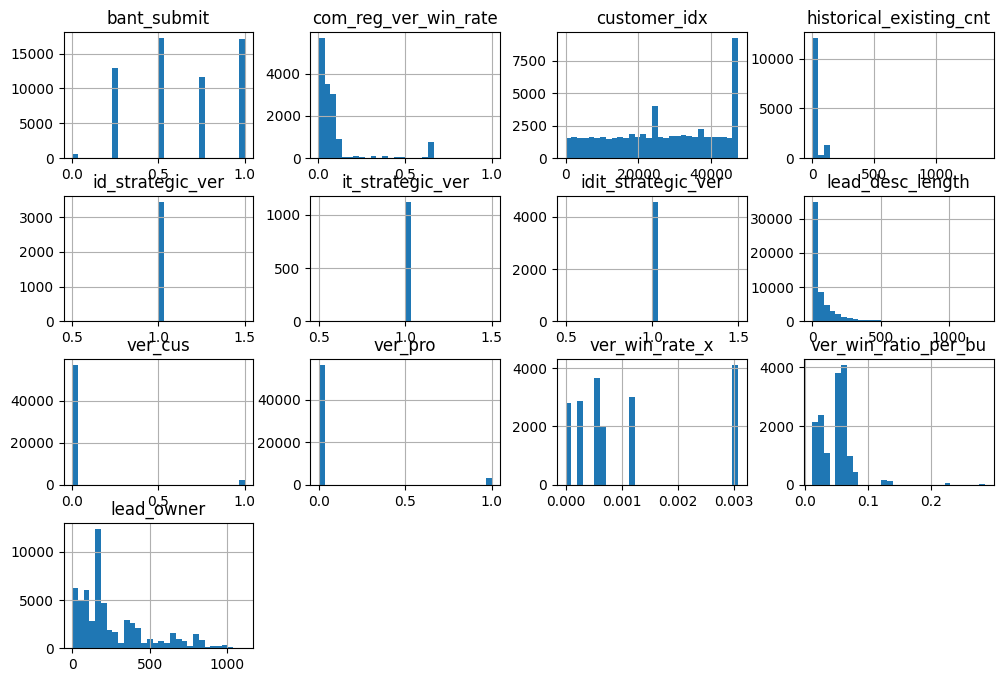

In [ ]:
df_train.hist(bins=30, figsize=(12, 8))
plt.show()

# Data Scaling


1. Eliminate Outlier


In [ ]:
df_all = pd.concat([df_train, df_test])
con = "customer_country"
ext = "expected_timeline"
# Let's get rid of the space between the sides
last_words = df_all[con].str.split('/').str[-1].str.strip()
df_all[con] = last_words
# Let's extract outliers (count to 5 or less, mainly e-mail addresses) and change them to 'India'
value_counts = df_all[con].value_counts()
words_below_5 = value_counts[value_counts < 5].index
df_all = df_all.replace({con : words_below_5}, "India")

value_counts = df_all[ext].value_counts()
words_below_50 = value_counts[value_counts < 50].index
df_all = df_all.replace({ext : words_below_50}, "etc.")

# Split data
df_train[con] = df_all.iloc[: len(df_train)][con]
df_test[con] = df_all.iloc[len(df_train) :][con]

df_train[ext] = df_all.iloc[: len(df_train)][ext]
df_test[ext] = df_all.iloc[len(df_train) :][ext]

2. Revise the values that are written differently(it's the same data).

In [ ]:
df_all = pd.concat([df_train, df_test])
replace_columns = [
    "customer_type",
    "inquiry_type",
    "expected_timeline"
]
df_all = df_all.replace({"customer_type" : "End Customer"}, "End-Customer")
df_all = df_all.replace({"inquiry_type" : "Quotation or purchase consultation"},
                        "Quotation or Purchase Consultation")
df_all = df_all.replace({"expected_timeline" :"less_than_3_months"},
                        "less than 3 months")

for col in replace_columns:
    df_train[col] = df_all.iloc[: len(df_train)][col]
    df_test[col] = df_all.iloc[len(df_train) :][col]

df_all["expected_timeline"].value_counts()

less than 3 months     19060
3 months ~ 6 months     5452
more than a year        3295
9 months ~ 1 year       1365
6 months ~ 9 months     1265
etc.                     688
less than 6 months       108
being followed up         66
Name: expected_timeline, dtype: int64

3. Let's fill in the NaN

In [ ]:
# KNNImputer has a better performance than SimpleImputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")

from sklearn.impute import KNNImputer
knn_imputer = KNNImputer()
# Consider the use of the InteractiveImputer as well.
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

Number type

In [ ]:
# Columns
label_columns_num = [
    "com_reg_ver_win_rate",
    "historical_existing_cnt",
    #"id_strategic_ver",
    #"it_strategic_ver",
    #"idit_strategic_ver",
    "ver_win_rate_x",
    "ver_win_ratio_per_bu"
]
df_all_num = pd.concat([df_train[label_columns_num],
                        df_test[label_columns_num]])
#imputer.fit(df_all_num)
knn_imputer.fit(df_all_num)

#  Fill the NaN
#X = imputer.transform(df_all_num)
X = knn_imputer.transform(df_all_num)

df_all_tr = pd.DataFrame(X, columns = df_all_num.columns,
                    index = df_all_num.index)

# Return data to train and test set
for col in label_columns_num:
    df_train[col] = df_all_tr.iloc[: len(df_train)][col]
    df_test[col] = df_all_tr.iloc[len(df_train) :][col]


In [ ]:
label_columns_std = [
    "historical_existing_cnt",
    "lead_desc_length"
]
df_all_std = pd.concat([df_train[label_columns_std],
                        df_test[label_columns_std]])
# Let's standardize the data
X_tr = std_scaler.fit_transform(df_all_std)

df_all_std = pd.DataFrame(X_tr, columns = df_all_std.columns,
                    index = df_all_std.index)

# Return data to train and test set
for col in label_columns_std:
    df_train[col] = df_all_std.iloc[: len(df_train)][col]
    df_test[col] = df_all_std.iloc[len(df_train) :][col]

Catrgoiral data


In [ ]:
# Convert catrgoiral data into numerical data
def label_encoding(series: pd.Series) -> pd.Series:

    my_dict = {}

    # Convert all elements into strings
    series = series.astype(str)

    for idx, value in enumerate(sorted(series.unique())):
        my_dict[value] = idx
    series = series.map(my_dict)

    return series

Assume Nan value as one category and convert it

In [ ]:
label_columns = [
    "business_subarea",
    "business_area",
    "business_unit",
    "customer_type",
    "enterprise",
    "customer_job",
    "inquiry_type",
    "product_category",
    "product_subcategory",
    "product_modelname",
    "customer_position",
    "response_corporate",
    "expected_timeline",
    "customer_country",
    "customer_country.1"
]

df_all = pd.concat([df_train[label_columns], df_test[label_columns]])
# 1. Change object type to Float
for col in label_columns:
    df_all[col] = label_encoding(df_all[col])

# 2. Data standardization
'''X = std_scaler.fit_transform(df_all)

df_all = pd.DataFrame(X, columns = df_all.columns,
                    index = df_all.index)'''

# 3. Split data
for col in label_columns:
    df_train[col] = df_all.iloc[: len(df_train)][col]
    df_test[col] = df_all.iloc[len(df_train) :][col]

Fill NaN with the most frequent value and convert it

In [ ]:
'''# Fill with frequent
freq_columns = [
    "business_subarea",
    "business_area",
    "business_unit",
    "customer_type",
    "enterprise",
    "customer_job",
    "inquiry_type",
    "product_category",
    "product_subcategory",
    "product_modelname",
    "customer_position",
    "response_corporate",
    "expected_timeline",
    "customer_country",
    "customer_country.1"
]

df_all_freq = pd.concat([df_train[freq_columns], df_test[freq_columns]])

# Replace it with the most frequency
imputer_freq = SimpleImputer(strategy = "most_frequent")
imputer_freq.fit(df_all_freq)

X = imputer_freq.transform(df_all_freq)

df_all_freq = pd.DataFrame(X, columns = df_all_freq.columns,
                    index = df_all_freq.index)

# Convert it object -> float
for col in freq_columns:
    df_all_freq[col] = label_encoding(df_all_freq[col])
df_all_freq= df_all_freq.astype(dtype='float64')

# Split data
for col in freq_columns:
    df_train[col] = df_all_freq.iloc[: len(df_train)][col]
    df_test[col] = df_all_freq.iloc[len(df_train) :][col]'''

# Feature Engineering

## Preference calculator using dual features

In [ ]:
def cal_purchase_ratio(series: pd.Series, cus_idx, name):
    for value in sorted(series.unique()):
        df_pr = df_all[(series == value)]
        for idx in sorted(df_pr[cus_idx].unique()):
            b =  len(df_pr[(df_pr[cus_idx] == idx) & (df_pr["is_converted"] == True)]) # numerator
            a = len(df_pr[df_pr[cus_idx] == idx]) # denominator
            condition = (series == value) & (df_all[cus_idx] == idx)
            # Apply the condition and add the value 'a'
            df_all.loc[condition, "new_column"] =  b / a
    df_train.insert(2, name, df_all.iloc[: len(df_train)]["new_column"])
    df_test.insert(3, name, df_all.iloc[len(df_train) :]["new_column"])

Customer preferences for specific lead owner.

In [ ]:
df_all = pd.concat([df_train, df_test])
cal_purchase_ratio(df_all["customer_idx"], "lead_owner", "customer_lead_owner_compatibility")

Customer preferences for specific products.

In [ ]:
df_all = pd.concat([df_train, df_test])
cal_purchase_ratio(df_all["product_category"], "customer_idx", "customer_product_preference")

Lead owner preferences for specific products.

In [ ]:
df_all = pd.concat([df_train, df_test])
cal_purchase_ratio(df_all["product_category"], "lead_owner", "lead_owner_product_compatibility")

Response corporate preferences for specific products.

In [ ]:
df_all = pd.concat([df_train, df_test])
cal_purchase_ratio(df_all["product_category"], "response_corporate", "corporate_product_compatibility")

##Preference Calculator with Triple Features

In [ ]:
def cal_purchase_prob(series: pd.Series, cus_idx, cus_idx2, name):
    for value in sorted(series.unique()):
        df_pr = df_all[(series == value)]
        for idx in sorted(df_pr[cus_idx].unique()):
            df_pr1 = df_pr[df_pr[cus_idx] == idx]
            for idx2 in sorted(df_pr1[cus_idx2].unique()):
                b = len(df_pr1[(df_pr1[cus_idx2] == idx2) & (df_pr1["is_converted"] == True)]) # numerator
                a = len(df_pr1[df_pr1[cus_idx2] == idx2]) # denominator
                condition = (series == value) & (df_all[cus_idx] == idx) & (df_all[cus_idx2] == idx2)
                # Apply the condition and add the value 'a'
                df_all.loc[condition, "new_column"] =  b / a
    df_train.insert(2, name, df_all.iloc[: len(df_train)]["new_column"])
    df_test.insert(3, name, df_all.iloc[len(df_train) :]["new_column"])

Customer preferences for specific products and lead owner.

In [ ]:
df_all = pd.concat([df_train, df_test])
cal_purchase_prob(df_all["customer_idx"], "lead_owner", "product_category","customer_lead_product_purchase")

Product preference for a particular customer position

In [ ]:
df_all = pd.concat([df_train, df_test])
cal_purchase_prob(df_all["customer_idx"], "customer_position", "product_category","position_product_preference")

## Preference calculator using single features

Scoring the training set and test set together shows higher performance.

In [ ]:
def make_prob_tr(series: pd.Series):

    my_dict = {}

    for value in sorted(series.unique()):
        b = len(df_train[(series == value)])
        a = len(df_train[(series == value) & (df_train["is_converted"] == True)])
        my_dict[value] = a / b

    series = series.map(my_dict)

    return series

In [ ]:
def make_prob_all(series: pd.Series) -> pd.Series:

    my_dict = {}

    for value in sorted(series.unique()):
        b = len(df_all[(series == value)]) # 분모
        a = len(df_all[(series == value) & (df_all["is_converted"] == True)]) # 분자
        my_dict[value] = a / b
    series = series.map(my_dict)

    return series

In [ ]:
pro_columns = [
    "lead_owner",
    "customer_idx",
    "business_subarea",
    "business_area",
    "business_unit",
    "customer_type",
    "enterprise",
    "customer_job",
    "inquiry_type",
    "product_category",
    "product_subcategory",
    "product_modelname",
    "customer_position",
    "response_corporate",
    "expected_timeline",
    "customer_country",
    "customer_country.1",
    #"id_strategic_ver", #
    #"it_strategic_ver",
    #"idit_strategic_ver",
]

In [ ]:
# Scoring categorical to preferences
df_all = pd.concat([df_train, df_test])
for col in pro_columns:
    df_all[col] = make_prob_all(df_all[col])

for col in pro_columns:
    df_train[col] = df_all.iloc[: len(df_train)][col]
    df_test[col] = df_all.iloc[len(df_train) :][col]

In [ ]:
# Correlation of 'is_converted' with each feature
corr_matrix = df_train.corr(numeric_only = True)
corr_matrix["is_converted"].sort_values(ascending = False)

is_converted                         1.000000
customer_lead_product_purchase       0.992978
customer_lead_owner_compatibility    0.990677
position_product_preference          0.982295
customer_product_preference          0.977856
customer_idx                         0.969518
lead_owner_product_compatibility     0.702851
lead_owner                           0.608278
corporate_product_compatibility      0.379648
product_category                     0.224155
customer_country                     0.215056
response_corporate                   0.195855
product_modelname                    0.189117
product_subcategory                  0.163105
business_subarea                     0.161486
com_reg_ver_win_rate                 0.155799
enterprise                           0.124941
customer_type                        0.121362
lead_desc_length                     0.112822
customer_job                         0.112417
business_area                        0.106998
ver_win_ratio_per_bu              

# Pipeline

In [ ]:
# Whole process of Pipeline
'''
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

One_Hot_Encoding_Col =[
    "business_unit",
    "enterprise",
    #"response_corporate",
    "business_area",
    "expected_timeline"
]
num_pipeline = Pipeline([
    ("impute", KNNImputer()),
    #("MinMaxScale",MinMaxScaler(feature_range = (-1,1)))
    StandardScaler()
])

cat_pipeline = make_pipeline(
    SimpleImputer(strategy = "most_frequent"),
    OneHotEncoder(handle_unknown = "ignore"))

log_pipeline = make_pipeline(
    KNNImputer(),
    FunctionTransformer(lambda x: np.log(x + 0.0001), feature_names_out = "one-to-one"),
    StandardScaler())

default_num_pipeline = make_pipeline(SimpleImputer(strategy = "median"),
                                    StandardScaler())
# make int type log scale.
preprocessing = ColumnTransformer([
    #("num", num_pipeline,label_columns_num),
    #("log", log_pipeline, ["customer_idx", "lead_desc_length", "lead_owner"]),
    #("num", num_pipeline, label_columns_num + label_columns),
    ("cat", cat_pipeline, One_Hot_Encoding_Col)])
# make_column_selector(dtype_include = object

#remainder = default_num_pipeline
'''

'\nfrom sklearn.preprocessing import FunctionTransformer\nfrom sklearn.compose import make_column_selector, make_column_transformer\nfrom sklearn.compose import ColumnTransformer\nfrom sklearn.pipeline import make_pipeline\nfrom sklearn.preprocessing import OneHotEncoder\nfrom sklearn.pipeline import Pipeline\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.preprocessing import MinMaxScaler\n\nOne_Hot_Encoding_Col =[\n    "business_unit",\n    "enterprise",\n    #"response_corporate",\n    "business_area",\n    "expected_timeline"\n]\nnum_pipeline = Pipeline([\n    ("impute", KNNImputer()),\n    #("MinMaxScale",MinMaxScaler(feature_range = (-1,1)))\n    StandardScaler()\n])\n\ncat_pipeline = make_pipeline(\n    SimpleImputer(strategy = "most_frequent"),\n    OneHotEncoder(handle_unknown = "ignore"))\n\nlog_pipeline = make_pipeline(\n    KNNImputer(),\n    FunctionTransformer(lambda x: np.log(x + 0.0001), feature_names_out = "one-to-one"),\n    StandardScaler())\n\ndefaul

In [ ]:
'''df_prepared = preprocessing.fit_transform(df_train)
df_prepared.shape
#preprocessing.get_feature_names_out()'''

'df_prepared = preprocessing.fit_transform(df_train)\ndf_prepared.shape\n#preprocessing.get_feature_names_out()'

Let's drop data

In [ ]:
label_columns_drop = [
    "customer_country.1"
]

for col in label_columns_drop:
    df_train.drop([col], axis=1, inplace = True)
    df_test.drop([col], axis=1, inplace = True)

# Validate model

##Split it learning and validation data

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(
    df_train.drop("is_converted", axis=1),
    df_train["is_converted"],
    test_size=0.2,
    shuffle=True,
    random_state=400,
)

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47439 entries, 43573 to 53596
Data columns (total 33 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   bant_submit                        47439 non-null  float64
 1   customer_country                   47439 non-null  float64
 2   position_product_preference        47439 non-null  float64
 3   customer_lead_product_purchase     47439 non-null  float64
 4   corporate_product_compatibility    47439 non-null  float64
 5   lead_owner_product_compatibility   47439 non-null  float64
 6   customer_product_preference        47439 non-null  float64
 7   customer_lead_owner_compatibility  47439 non-null  float64
 8   business_unit                      47439 non-null  float64
 9   com_reg_ver_win_rate               47439 non-null  float64
 10  customer_idx                       47439 non-null  float64
 11  customer_type                      47439 non-null 

# Train model

Candidate

- DecisionTreeClassifier
- RandomForestClassifier
- LogisticRegression
- GradientBoostingClassifier
- AdaBoostClassifier

In [ ]:
#model = make_pipeline(preprocessing, DecisionTreeClassifier())
model = DecisionTreeClassifier()   #(max_depth = 4, random_state = 42)
model.fit(x_train.fillna(0), y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_forest = RandomForestClassifier(random_state=42)
#model_forest = make_pipeline(preprocessing,RandomForestClassifier(random_state=42))
#model_forest = RandomForestClassifier()
model_forest.fit(x_train.fillna(0), y_train)

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
model_log_reg = LogisticRegression(max_iter = 7000, random_state=42) #penalty = 'l2', C = 0.01
#model_log_reg = LogisticRegression(max_iter = 10000)
#model_log_reg = make_pipeline(preprocessing,LogisticRegression(max_iter = 10000))
model_log_reg.fit(x_train.fillna(0), y_train)

LogisticRegression(max_iter=7000, random_state=42)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model_grad_boost = GradientBoostingClassifier(n_estimators = 3,
                                              min_samples_leaf = 5,
                                              max_depth = 3,
                                              learning_rate = 1)
model_grad_boost.fit(x_train.fillna(0), y_train)

GradientBoostingClassifier(learning_rate=1, min_samples_leaf=5, n_estimators=3)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model_ada_boost = AdaBoostClassifier(n_estimators=5, random_state=42)
model_ada_boost.fit(x_train.fillna(0), y_train)

AdaBoostClassifier(n_estimators=5, random_state=42)

#HyperParameter Tuning

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score, classification_report
from sklearn.model_selection import GridSearchCV
model = GradientBoostingClassifier(random_state=42)
model.fit(x_train.fillna(0), y_train)

# Model Evaluation on Validation Set
y_val_pred = model.predict(x_val.fillna(0))
f1 = f1_score(y_val, y_val_pred)
#print(f"F1 Score on Validation Set: {f1}")

# Optionally, Hyperparameter Tuning
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.1, 0.01],
    'max_depth': [3, 5]
}
grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid, scoring='f1', cv=5, n_jobs=-1)
grid_search.fit(x_train.fillna(0), y_train)

# Best parameters and F1 Score
best_model = grid_search.best_estimator_
y_val_pred_best = best_model.predict(x_val.fillna(0))
best_f1 = f1_score(y_val, y_val_pred_best)

# Measure model performance

In [ ]:
def get_clf_eval(y_test, y_pred=None):
    confusion = confusion_matrix(y_test, y_pred, labels=[True, False])
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, labels=[True, False])
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred, labels=[True, False])

    print("Confusion Matrix:\n", confusion)
    print("\nAccuracy: {:.4f}".format(accuracy))
    print("Precision: {:.4f}".format(precision))
    print("Recall: {:.4f}".format(recall))
    print("F1 score: {:.4f}".format(F1))

In [ ]:
pred = model.predict(x_val.fillna(0))
#pred = search.predict(x_val.fillna(0))
get_clf_eval(y_val, pred)

Confusion Matrix:
 [[  938     9]
 [   12 10901]]

Accuracy: 0.9982
Precision: 0.9874
Recall: 0.9905
F1 score: 0.9889


In [ ]:
pred_forest = model_forest.predict(x_val.fillna(0))
get_clf_eval(y_val, pred_forest)

Confusion Matrix:
 [[  937    10]
 [   13 10900]]

Accuracy: 0.9981
Precision: 0.9863
Recall: 0.9894
F1 score: 0.9879


In [ ]:
pred_log_reg = model_log_reg.predict(x_val.fillna(0))
get_clf_eval(y_val, pred_log_reg)

Confusion Matrix:
 [[  938     9]
 [    9 10904]]

Accuracy: 0.9985
Precision: 0.9905
Recall: 0.9905
F1 score: 0.9905


In [ ]:
pred_grad = model_grad_boost.predict(x_val.fillna(0))
get_clf_eval(y_val, pred_grad)

Confusion Matrix:
 [[  941     6]
 [   19 10894]]

Accuracy: 0.9979
Precision: 0.9802
Recall: 0.9937
F1 score: 0.9869


#Test


In [ ]:
# Data separation for prediction
x_test = df_test.drop(["is_converted", "id"], axis=1)

In [ ]:
test_dec_tree = model.predict(x_test.fillna(0))

In [ ]:
test_pred = best_model.predict(x_test.fillna(0))
#test_pred = search.predict(x_test.fillna(0))
sum(test_pred) # Number predicted as True

1431

In [ ]:
test_pred_forest = model_forest.predict(x_test.fillna(0))
sum(test_pred_forest) # Number predicted as True

1429

In [ ]:
test_pred_log_reg = model_log_reg.predict(x_test.fillna(0))
sum(test_pred_log_reg)

1400

In [ ]:
#pred = search.predict(x_val.fillna(0))
df_sub = pd.read_csv("/content/drive/MyDrive/LG Aimers/submission.csv")
get_clf_eval(df_sub["is_converted"], test_pred)

Confusion Matrix:
 [[1389   24]
 [  42 3816]]

Accuracy: 0.9875
Precision: 0.9706
Recall: 0.9830
F1 score: 0.9768


In [ ]:
get_clf_eval(df_sub["is_converted"], test_pred_forest)

Confusion Matrix:
 [[1382   31]
 [  47 3811]]

Accuracy: 0.9852
Precision: 0.9671
Recall: 0.9781
F1 score: 0.9726


In [ ]:
get_clf_eval(df_sub["is_converted"], test_dec_tree)

Confusion Matrix:
 [[1382   31]
 [  43 3815]]

Accuracy: 0.9860
Precision: 0.9698
Recall: 0.9781
F1 score: 0.9739


##Write submission file

In [ ]:
'''# Read submit data
df_sub = pd.read_csv("submission.csv")
df_sub["is_converted"] = test_pred

# Save submit file
df_sub.to_csv("submission.csv", index=False)'''

'# Read submit data\ndf_sub = pd.read_csv("submission.csv")\ndf_sub["is_converted"] = test_pred\n\n# Save submit file\ndf_sub.to_csv("submission.csv", index=False)'